#  Анализ игровых платформ

***Для интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры, из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й.***

### Откройте файл с данными и изучите общую информацию

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from scipy import stats as st

In [ ]:
df = pd.read_csv('/games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Описание данных
Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы проданных копий)
EU_sales — продажи в Европе (миллионы проданных копий)
JP_sales — продажи в Японии (миллионы проданных копий)
Other_sales — продажи в других странах (миллионы проданных копий)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [ ]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Пропуски имеются в столбцах:

Name             название игры                         2  
Year_of_Release  год выпуска                           269
Critic_Score     оценка критиков (максимум 100)        8578
User_Score       оценка пользователей (максимум 10)    6701
Rating           рейтинг от организации ESRB           6766

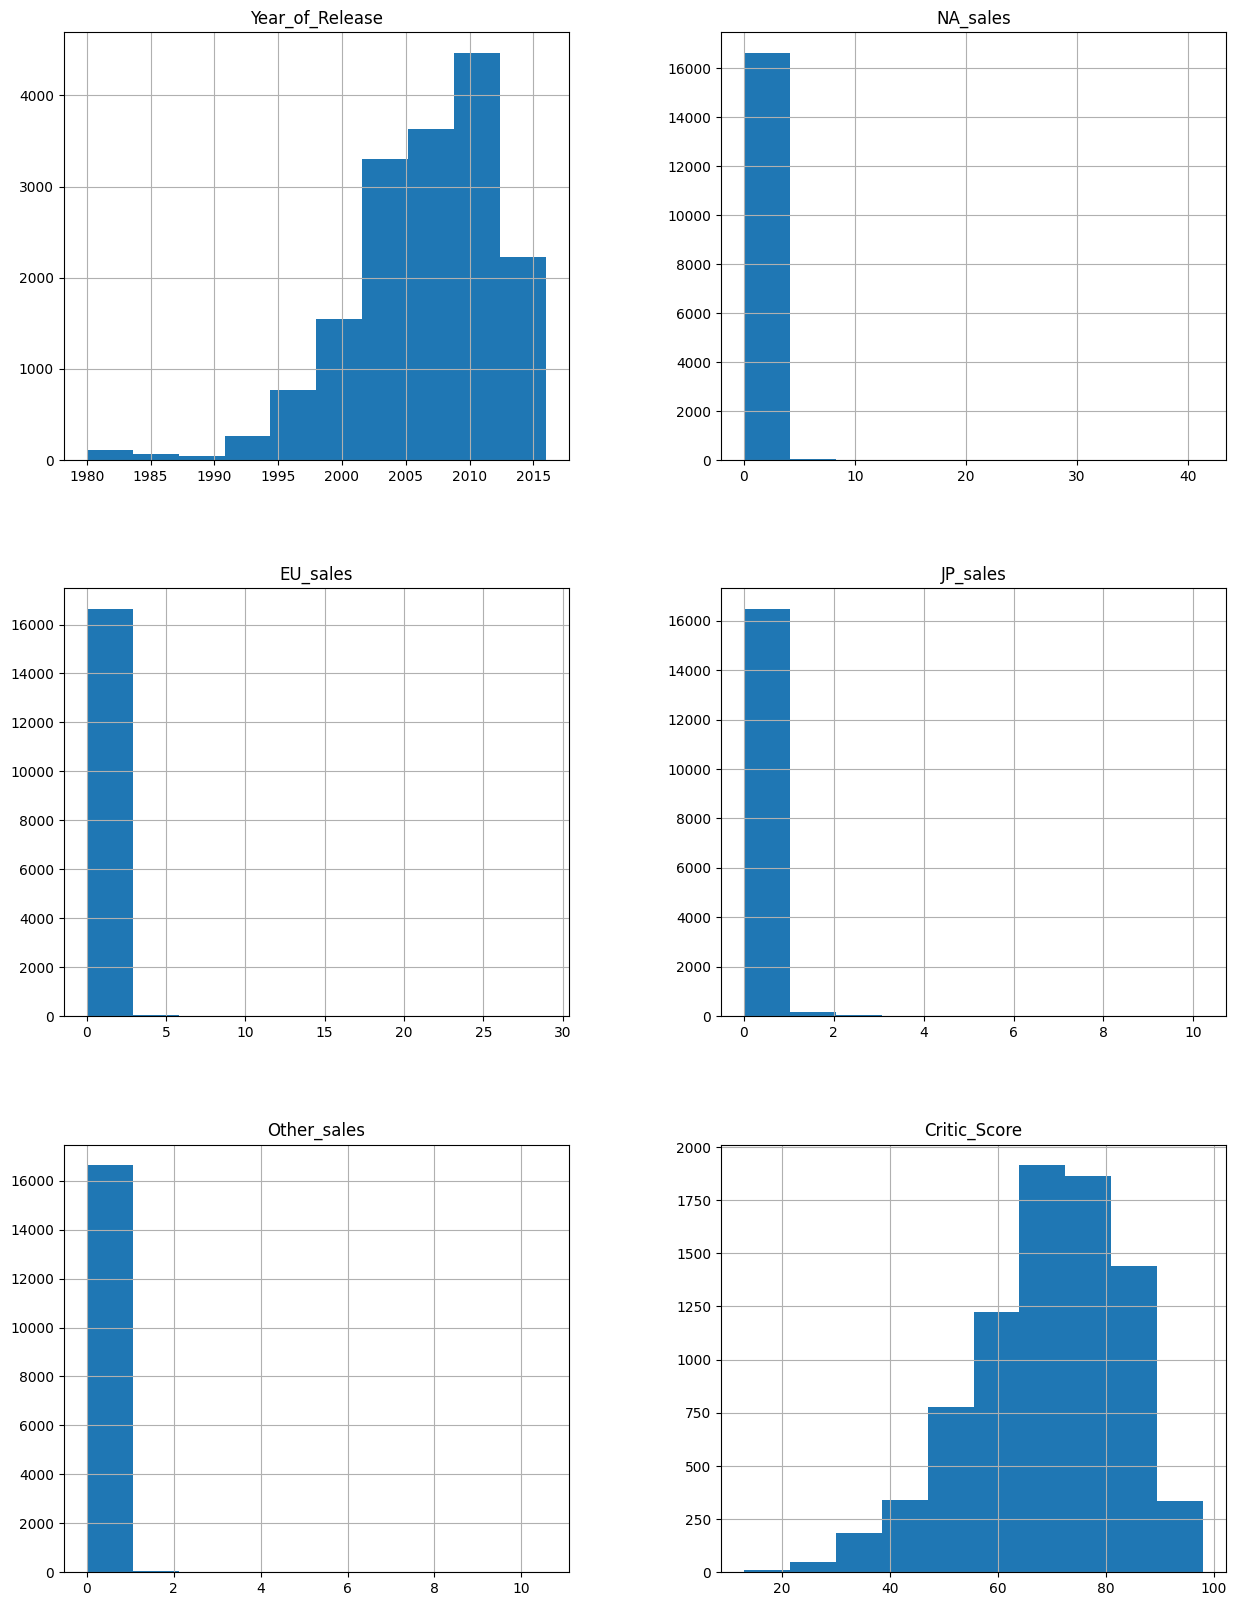

In [ ]:
df.hist(figsize=(15, 20))
plt.show()

*Вывод:
При первичном взгляде на данные понимамаем, что необходимо подготовить данные к дальнейшей работе, а именно, привести название столбцов к нижнему регистру, поменять типы данных, и провести работу с пропусками в тех столбцах, где это возможно*

### Предобработка данных

**Заменим названия столбцов (приведите к нижнему регистру)**

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


***Преобразуйте данные в нужные типы.***

In [ ]:
# Преобразуем тип данных на целочисленный(год не может быть не целым) и удаляем пропуски.
df=df.dropna(subset = ['year_of_release'])
df['year_of_release'] = df['year_of_release'].astype(int)
df['year_of_release'].isna().sum()

<ipython-input-12-4e1bf4302c29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_of_release'] = df['year_of_release'].astype(int)


0

In [ ]:
# Преобразуем данные с рейтингом из строки в число с плавающей запятой
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')



<ipython-input-13-2ebd8618ccc8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')


В столбце Year_of_Release — год выпуска преобразуем данные в целочисленные значения(год выпуска не может быть не целым числом),так же удаляем пропущенные значения 269 шт, не корректно заменять средними или медианой, или 0. Потеря 269 строк не критична.
В столбце User_Score — оценка пользователей переводим данные в float64, так как рейтинг это число с плавающей запятой, а не object. Пропущенные значения не корректно удалять(приведет к потере большой части данных), либо заменять другим числом. Оставляем данные без изменений. Значения рейтинга'tbd'(To Be Determined, что означает, что на данный момент данные отсутствуют) заменим на nan.

***Подготовим данные. Обработаем оставшиеся пропуски***

In [ ]:
df['rating']= df['rating'].fillna(value ='no_esrb')
df['rating'].isna().sum()
# Рейтинг от организации ESRB является категориальным типом данных, заменяем пропущенные значения на no_esrb.

<ipython-input-14-e10ff9573712>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating']= df['rating'].fillna(value ='no_esrb')


0

<div class="alert alert-info">
Заменил пропуск на 'no_esrb'

In [ ]:
df['name'] = df['name'].fillna(value='no_esrb')
df['name'].isna().sum()
# Имя игры является категориальным типом данных, заменяем пропущенные значения на no_esrb.

<ipython-input-15-6d1b955436c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'] = df['name'].fillna(value='no_esrb')


0

In [ ]:
df['genre'] = df['genre'].fillna(value='no_esrb')
df['genre'].isna().sum()
# Жанр игры является категориальным типом данных, заменяем пропущенные значения на no_esrb.

<ipython-input-16-beac611d2445>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'] = df['genre'].fillna(value='no_esrb')


0

In [ ]:
# Проверям датасет на явные дубликаты.
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16446 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


***Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец***

In [ ]:
df['sales_world'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']+df['other_sales']

<ipython-input-19-76e908d7e56a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sales_world'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']+df['other_sales']


*Вывод:
В результате предобработки данных было удалено 269 значений, что является небольшой потерей в общей массе.
В столбцах user_score, year_of_release был заменен тип данных, на необходимый в дальнейшей работе.
В столбцах rating,name,genre содержащих категориальные переменные пропуски были заменены на  текстовое значение no_esrb.
Пропуски в столбцах user_score и  critic_score содержащих количественные переменные было решено не удалять и не заменять пропуски, что бы не искожать и не сокращать исходные данные.
Был добавлен новый столбец sales_world для подсчета суммы продаж по миру.
Наименование столбцов приведено к нижнему регистру
Данные полностью готовы для дальнейшего исследования*


### Проведите исследовательский анализ данных Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

<function matplotlib.pyplot.show(close=None, block=None)>

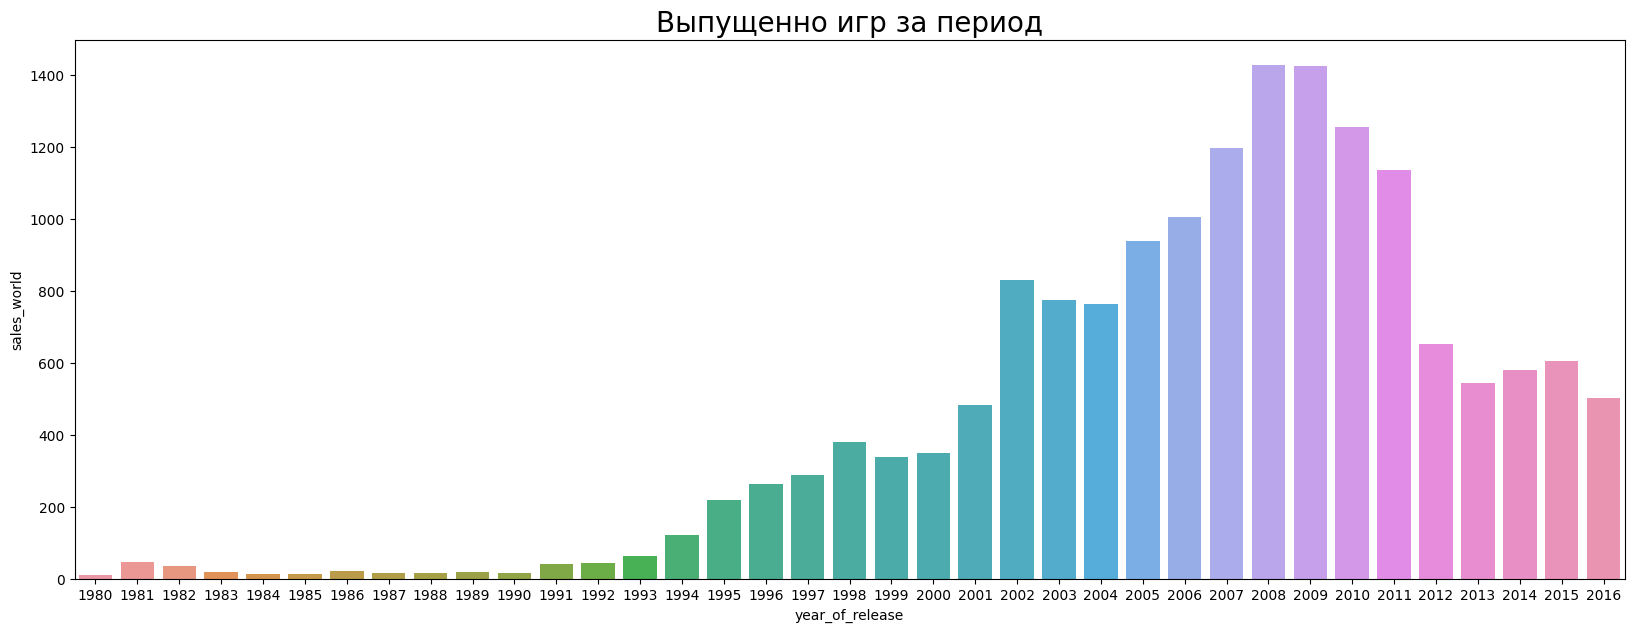

In [ ]:
timeseries = df.pivot_table(index='year_of_release', values='sales_world', aggfunc='count').reset_index()
plt.figure(figsize=(20,7))
plt.title('Выпущенно игр за период',fontsize = 20)
plt.xlabel('Год')
plt.ylabel('Количество игр')
sns.barplot(x = timeseries['year_of_release'],y = timeseries['sales_world'])
plt.show


In [ ]:
df.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

*Как видно из динамики 1980-1993 года, колличество выпущенных игр в год не превышало двухзначных занчений. Объясняется зарождением игровой отрасли, большинство игры выходит на игровых автоматах, либо на нишевых консолях. Отсутвуют какие либо интернет магазины . Далее выпуск игр насчитывает уже сотни и тысячи игр. Данные в период 1980-1993г не важны для анализа, но отлично показывают развитие индустрии. Самые большие показатели выпуска игр с 2006-2012, возможно связанны с открытием интернет магазина PS store.*

***Проведите ИА данных Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?***

In [ ]:

platform_top =(

    df.pivot_table(index=['platform'], values='sales_world', aggfunc='sum').reset_index()
    .sort_values(by=['sales_world'], ascending= False)

)
platform_top.head(5) #Выделяем ТОП-5 платформ


,platform,sales_world
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78


Как видно из таблицы выше в ТОП платформ входит PS2,X360,PS3,Wii,DS.
Ниже постороим график продаж по всем платформам.

<function matplotlib.pyplot.show(close=None, block=None)>

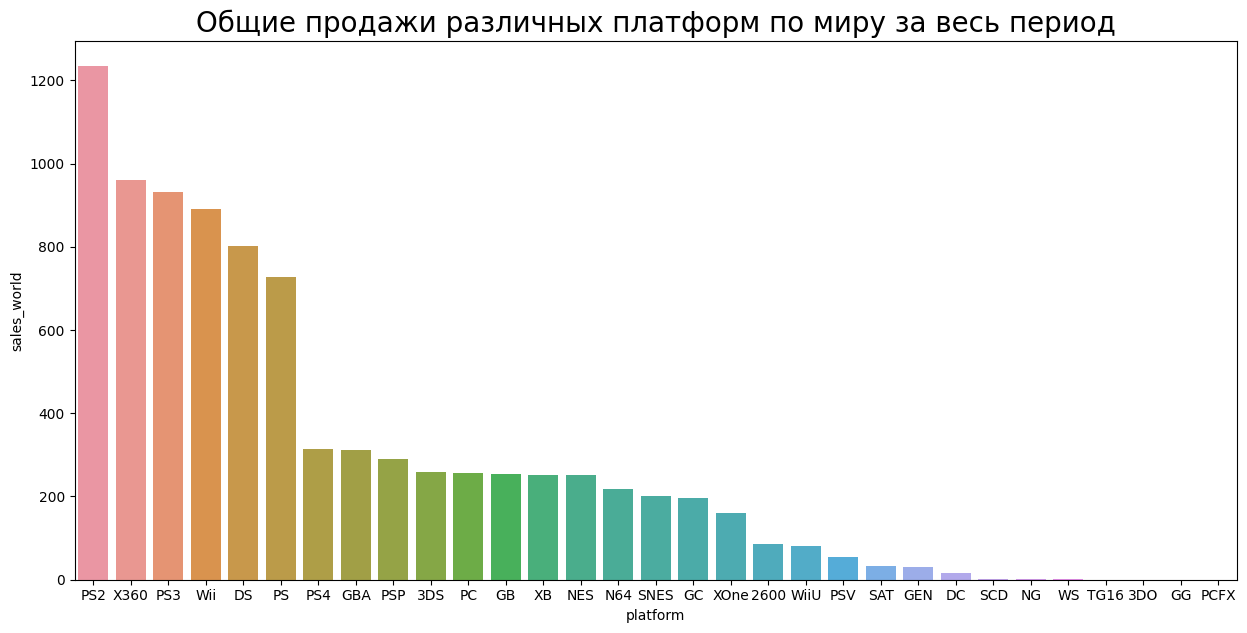

In [ ]:
plt.figure(figsize=(15,7))
plt.title('Общие продажи различных платформ по миру за весь период',fontsize = 20)
plt.xlabel('Платформа')
plt.ylabel('Продажи')
sns.barplot(x = platform_top['platform'],y = platform_top['sales_world'])
plt.show

График показывает что лидерами по продажам является 6 платформ PS2,X360,PS3,Wii,DS,PS. Ниже посмотрим на продажи в разрезе каждого года

<function matplotlib.pyplot.show(close=None, block=None)>

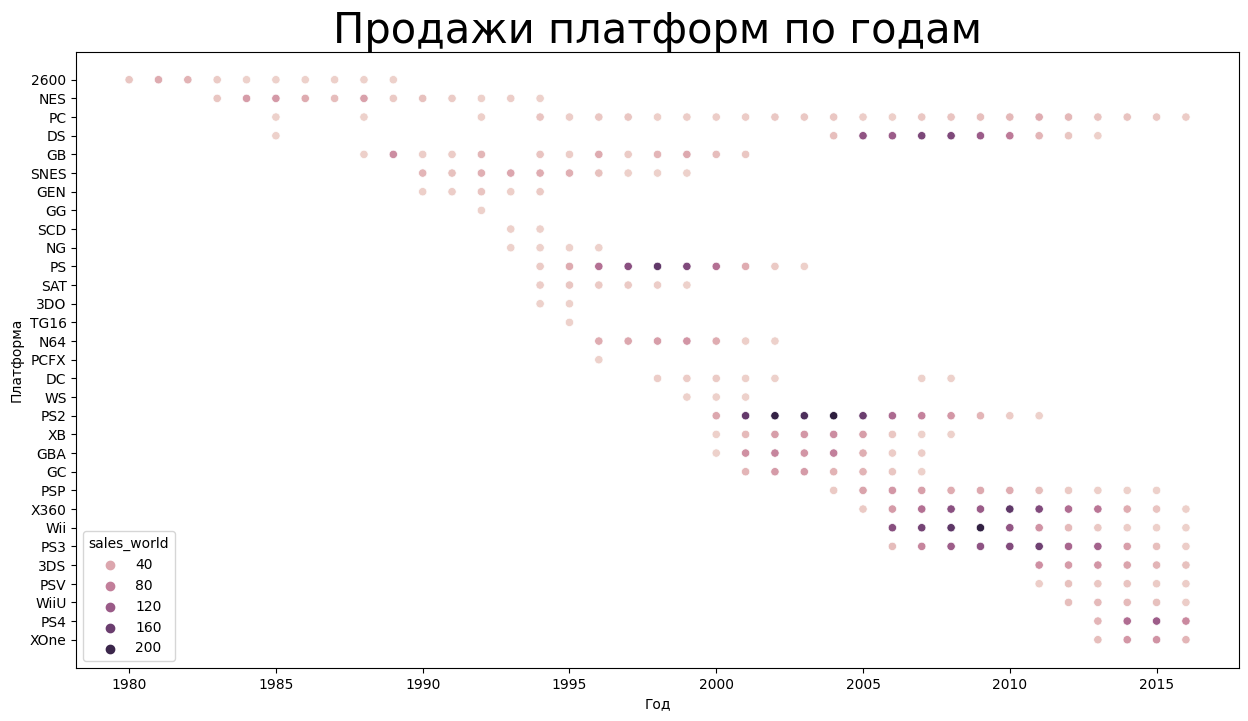

In [ ]:
platform_all=(
    df.pivot_table(index=['year_of_release', 'platform'], values='sales_world', aggfunc='sum')
         .sort_values(by=['year_of_release', 'sales_world'], ascending=[True, False]).reset_index()
)

plt.figure(figsize=(15,8))
plt.title('Продажи платформ по годам',fontsize = 30)
plt.xlabel('Год')
plt.ylabel('Платформа')
sns.scatterplot(x = platform_all['year_of_release'],y = platform_all['platform'],hue =platform_all['sales_world'])
plt.show


*Общий вывод по иследованию:
1)В среднем цикл жизни платформы 10 лет.
2)Пик продаж приходится на период с 2-5 год жизни плтформы)
3)Самый длинный цикл жизни платформы имеет PC.*


***Проведите ИА данных Возьмите данные за соответствующий актуальный период.***

Что бы правильно прогнозировать продажи на 2017 г, возьмем данные за период с 2014 г включительно. Такой срез позволить взять в анализ только актуальные платформы, тем самым позволит более точечно распределить бюджет рекламной компании на 2017 г.

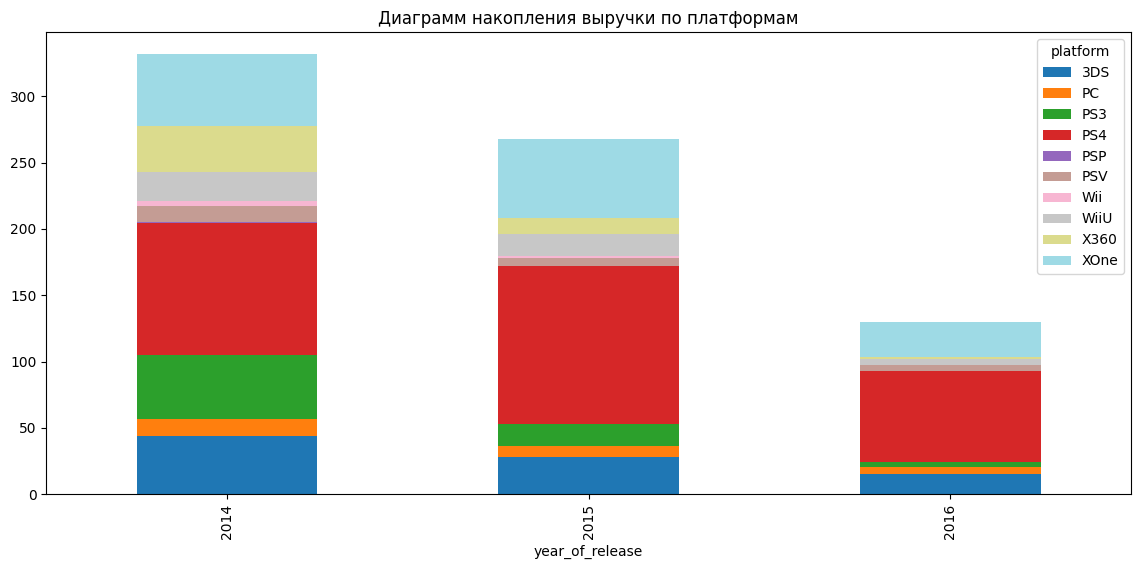

In [ ]:

filter_platform = df.query ("year_of_release >= 2014 ")# Делаем срез и на основании среза формируем сводную таблицу
filter_platform = filter_platform.pivot_table(index=['year_of_release'],columns = 'platform', values='sales_world', aggfunc='sum').reset_index()
filter_platform.plot(x='year_of_release', kind='bar', stacked=True,colormap='tab20', figsize = (14,6),title = 'Диаграмм накопления выручки по платформам')
plt.show()
#Строим диаграмму накопления, что бы увидеть какие платформы генерируют выручку за выбранный переод

<Axes: title={'center': 'Кривая выручки'}, xlabel='year_of_release'>

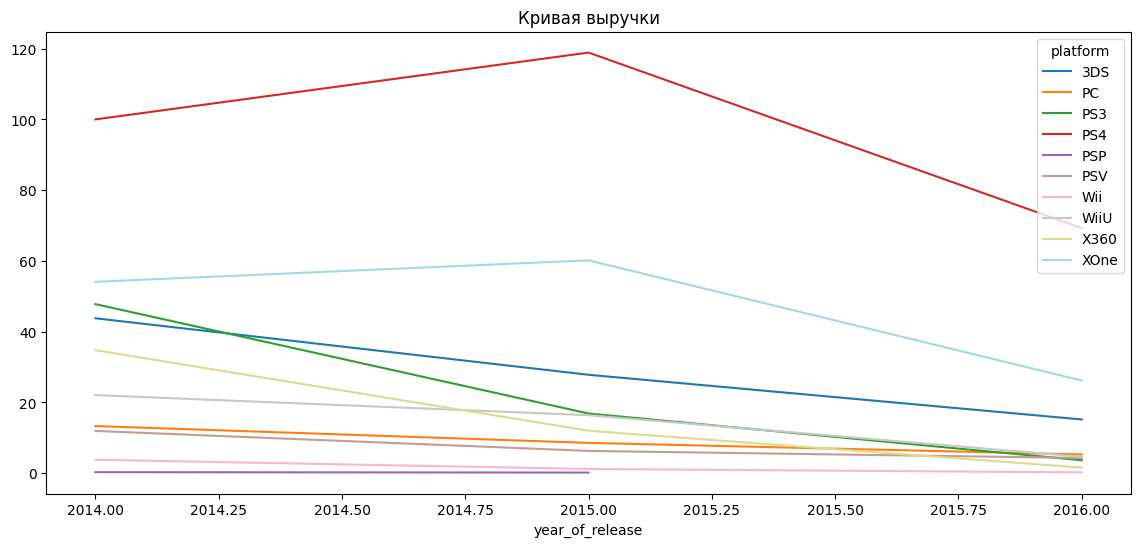

In [ ]:
filter_platform.plot(x='year_of_release',colormap='tab20',figsize = (14,6),title = 'Кривая выручки')

In [ ]:
top_platform_ten_yers = df.query ("year_of_release >= 2007 ")# Выделим 10 платформ с 2007 г по 2016г
top_platform_ten_yers = top_platform_ten_yers.pivot_table(index=['platform'], values='sales_world', aggfunc='sum').reset_index()\
    .sort_values(by=['sales_world'], ascending= False)
top_platform_ten_yers.head(10)

,platform,sales_world
7,PS3,910.38
13,X360,901.37
11,Wii,754.03
2,DS,535.54
8,PS4,314.14
0,3DS,257.81
9,PSP,183.31
6,PS2,162.38
5,PC,160.57
15,XOne,159.32


*Лидерами продаж за 10 лет являются: PS3,X360,Wii,DS,. Однако данные консоли(платформы) находятся в конце цикла. Им на смену пришли новые консоли, от тех же производителей. Платформы WiiU,PSV и 3DS находятся еще в 10 летнем цикле, но уже прошли стадии роста конслолей (2-5 год) и вряд-ли будут демонстрировать динамику. Перспиктивными платформами на 2017 г будут являться новые поколения консолей PS4, XOne. PC как универсальная платформа не имеющая циклов демонстрирует небольшие продажи, но зато стабильные.*

***Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.***

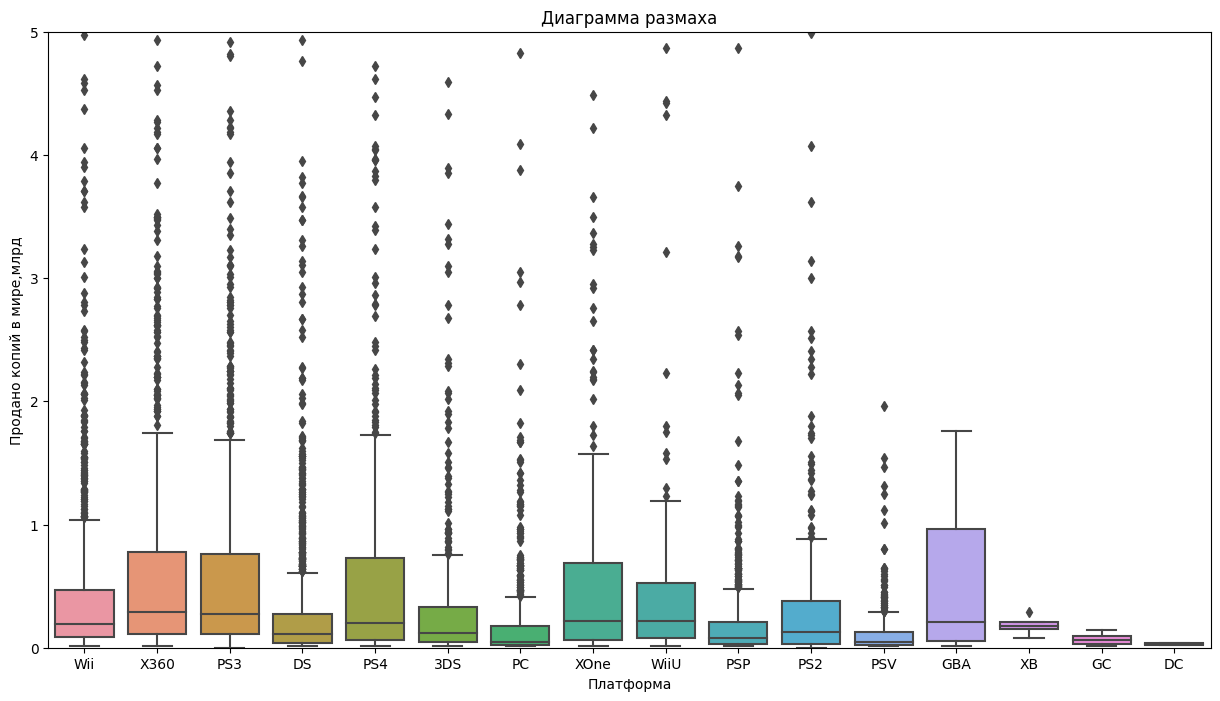

In [ ]:
plt.figure(figsize =(15,8))
sns.boxplot(data = df.query ("year_of_release >= 2007 "), x='platform',y ='sales_world',)

plt.title('Диаграмма размаха')
plt.xlabel('Платформа')
plt.ylabel('Продано копий в мире,млрд')
plt.ylim(0, 5)
plt.show()

df.query ("year_of_release >= 2007 ").groupby('platform')['sales_world'].describe()


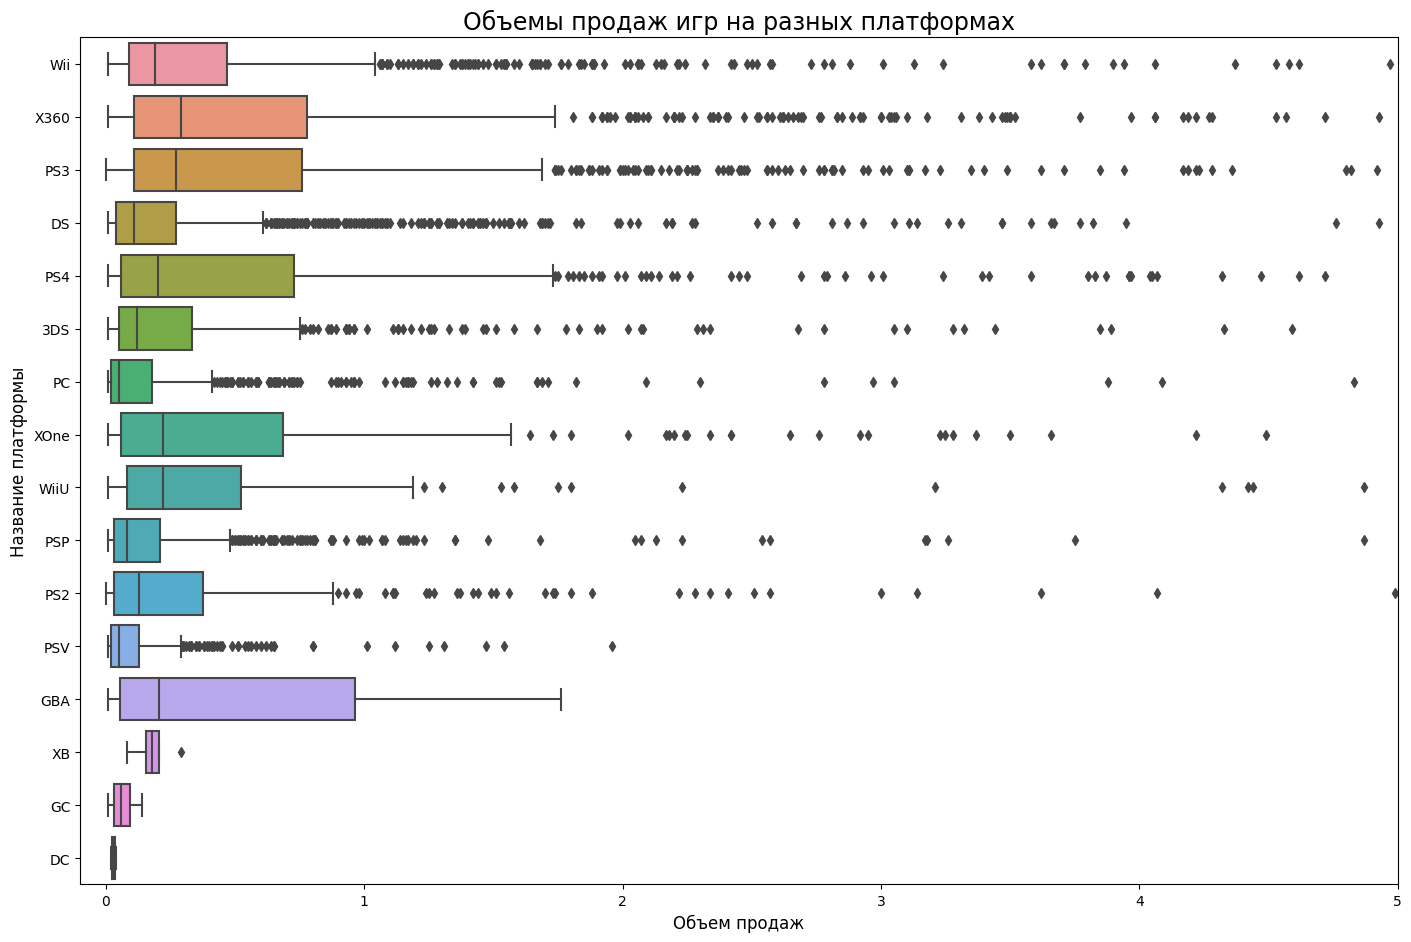

In [ ]:
# код ревьюера
plt.figure(figsize=(17, 11))
sns.boxplot(data=df.query ("year_of_release >= 2007 "), y='platform', x='sales_world')
plt.xlim(-0.1, 5)

plt.title('Объемы продаж игр на разных платформах', size=17)
plt.xlabel('Объем продаж', size=12)
plt.ylabel('Название платформы', size=12)

plt.show()

*Вывод*

*Наибольшие медианные продажи у платформ X360 и PS3.*

*Почти у всех платформ есть много выбросов - объясняется играми которые выстрелили на данной платформе(скорее всего эксклюзивные
игры платформы). Лидер по показателю выбраса Wii консоль от Нинтендо в целом заточена только на эксклюзивные игры, далее идут
X360 и PS3.*

*Есть платформа DC, у которой совсем мало продаж.*


***Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.
За основу возьмем плтформу с наибольшим числом проданных копий за 10 лет- PS3***


In [ ]:
# Сделаем срез в датафрейме начиная с 2014 года. Данные за предыдущие года не выжны для дальнейшего анализа
df_year = df.copy()
df_year = df_year[df_year['year_of_release'] >= 2014]


In [ ]:
ps = df_year[df_year['platform']=='PS3']
ps['critic_score'].corr(ps['sales_world'])#Рассмотрим влияние оценок критиков на продажи.

0.44657460493190704

<Axes: title={'center': 'Корреляцию зависимости отзыва критиков на продажи платформа PS3'}, xlabel='critic_score', ylabel='sales_world'>

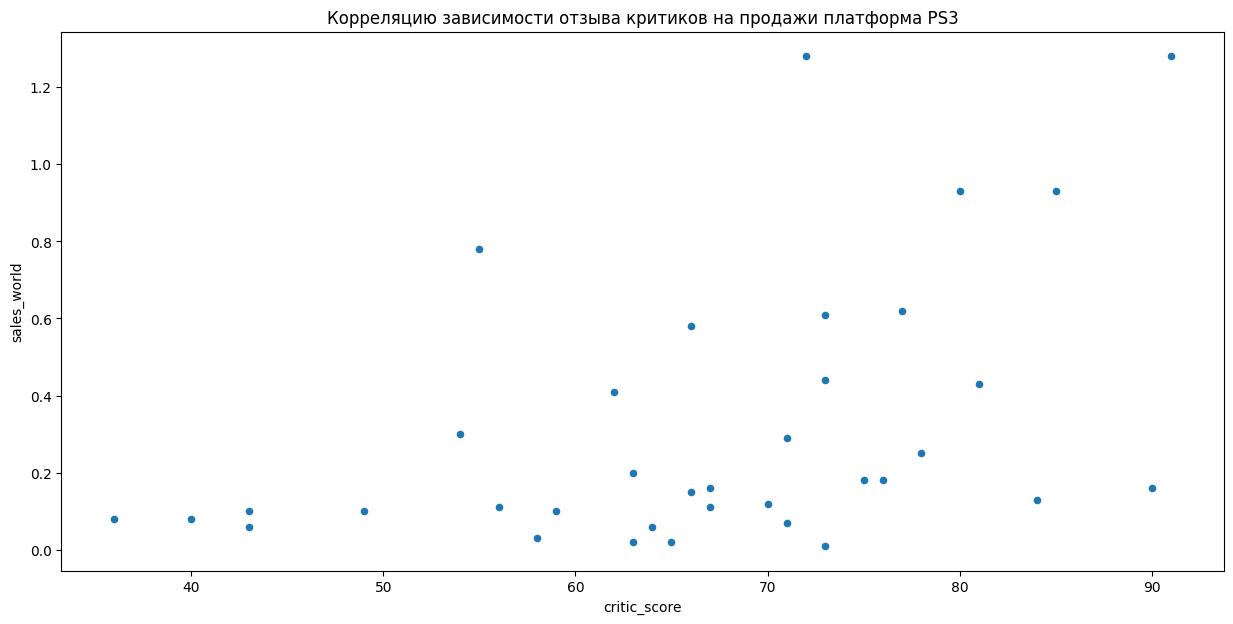

In [ ]:
ps.plot(
title = 'Корреляцию зависимости отзыва критиков на продажи платформа PS3',x='critic_score', y='sales_world', kind='scatter',figsize = (15,7))

In [ ]:
ps['user_score'].corr(ps['sales_world'])#Рассмотрим влияние оценок пользователей на продажи.

-0.16676141347662118

<Axes: title={'center': 'Корреляцию зависимости отзыва пользователей на продажи платформа PS3'}, xlabel='user_score', ylabel='sales_world'>

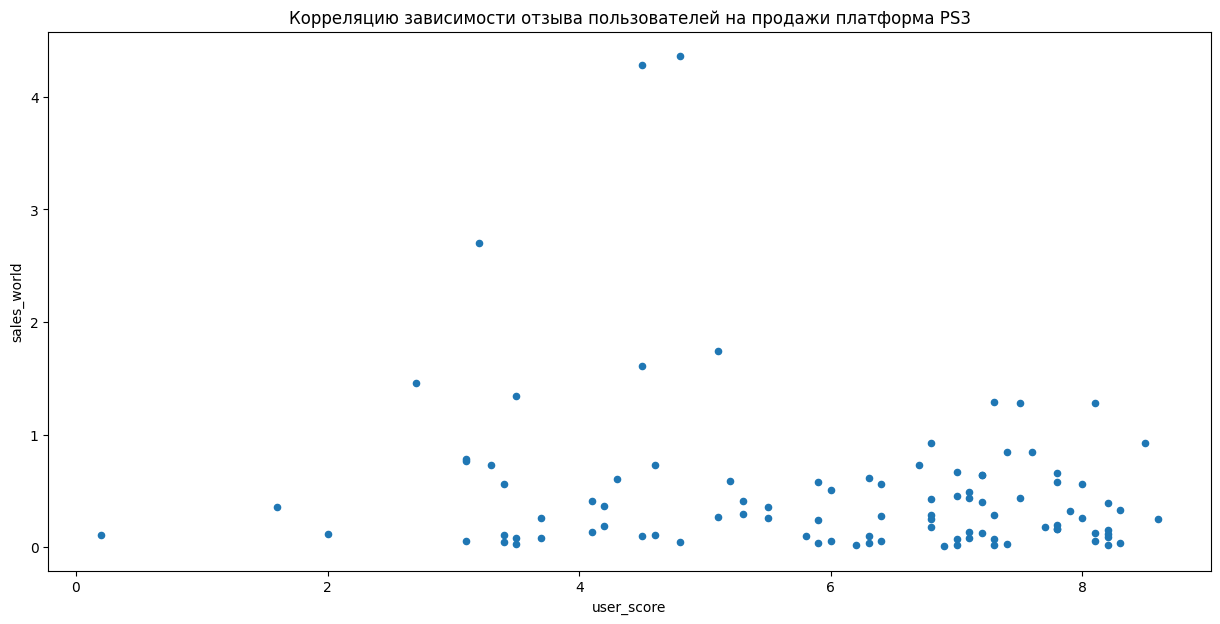

In [ ]:
ps.plot(
 title = 'Корреляцию зависимости отзыва пользователей на продажи платформа PS3',x='user_score', y='sales_world', kind='scatter',figsize = (15,7))

*Как видно из коэффицента корреляции(0.44) наибольшее влияние на продажи оказывает оценка пользователей. Оценка критиков  имеет слабый отрицательный коэффицент(-0.16). На графике оценок пользователей выдны точки имеющие высокие продажи, при малом рейтинге, скорее всего связанно с выходом новой части зарекомендовавшей себя игры, которую купило много пользователей, но новая часть ожиданий не оправдала. Вывод что, пользовательские оценки игры оказывают среднее положительное влияние на продажи, в то время как оценка критиков оказывает слабое отрицательно влияние на продажи*

***Соотнесем выводы с продажами игр на других платформах***

In [ ]:
df_year.query (" platform != 'PS3'").corr()

<ipython-input-35-28bf7dbf3bee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_year.query (" platform != 'PS3'").corr()


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales_world
year_of_release,1.000000,-0.127172,-0.093550,-0.056644,-0.089357,0.047660,0.014820,-0.118381
na_sales,-0.127172,1.000000,0.737668,0.271034,0.840344,0.333491,-0.023312,0.914612
eu_sales,-0.093550,0.737668,1.000000,0.195996,0.929968,0.271520,-0.032332,0.914589
jp_sales,-0.056644,0.271034,0.195996,1.000000,0.177394,0.123737,0.185376,0.427940
other_sales,-0.089357,0.840344,0.929968,0.177394,1.000000,0.290350,-0.011784,0.933104
critic_score,0.047660,0.333491,0.271520,0.123737,0.290350,1.000000,0.487500,0.327775
user_score,0.014820,-0.023312,-0.032332,0.185376,-0.011784,0.487500,1.000000,-0.003859
sales_world,-0.118381,0.914612,0.914589,0.427940,0.933104,0.327775,-0.003859,1.000000


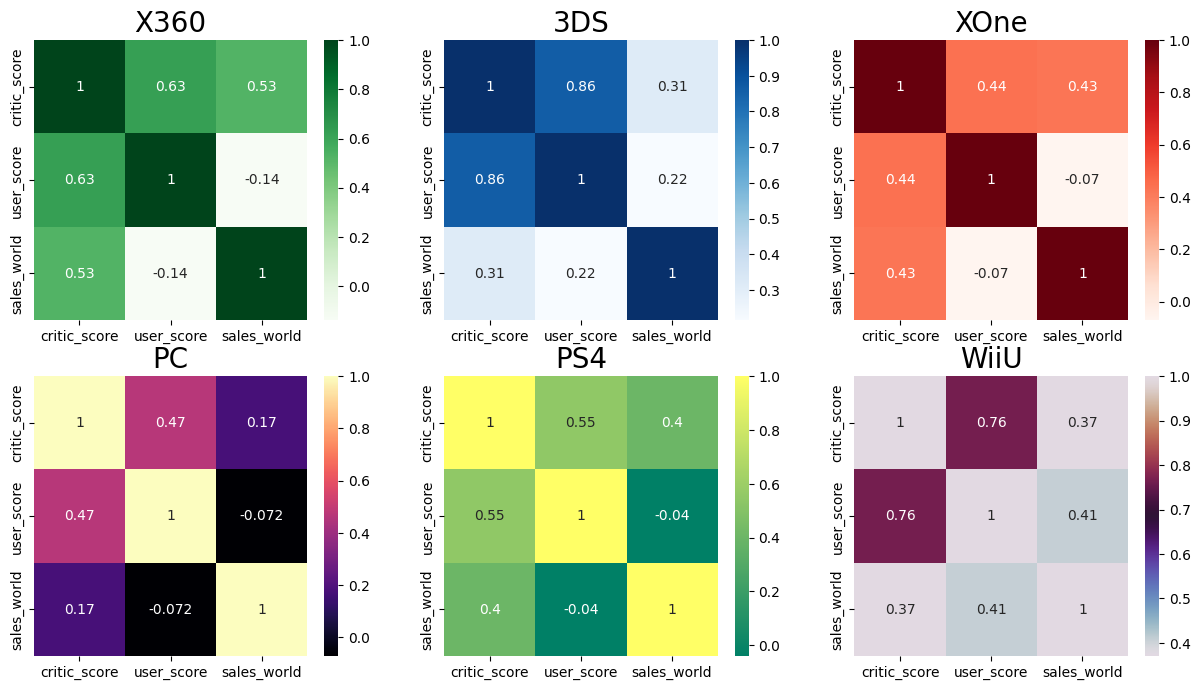

In [ ]:
platforms=['X360', '3DS', 'XOne', 'PC', 'PS4', 'WiiU'] # Укажем несколько других популярных платформ за период
heat_colors=['Greens', 'Blues', 'Reds', 'magma', 'summer', 'twilight'] # Пусть тепловые карты будут разных цветов
n=0 # Счетчик порядкового номера положения графика и цвета в heat_colors

fig = plt.figure(figsize=(15,8))
for platform in platforms:
    temp_df= df.loc[(df['platform'] == platform) & (df['year_of_release'] >= 2014)]
    heatmap_temp = temp_df[['critic_score', 'user_score', 'sales_world']]
    plt.subplot(2, 3, n+1)
    sns.heatmap(heatmap_temp.corr(), cmap=heat_colors[n], annot=True)
    plt.title(platform, fontsize=20)
    n+=1
plt.show()


*Картина по другим жанрам не столь однозначная. Пользовательская оценка не оказывает очивидного влияние на продажи. Оценка критиков оказывает среднее влияние на продажи*

***Проведем исследовательский анализ данных. Посмотрим на общее распределение игр по жанрам.
Выделим самые прибыльных жанр.***

<function matplotlib.pyplot.show(close=None, block=None)>

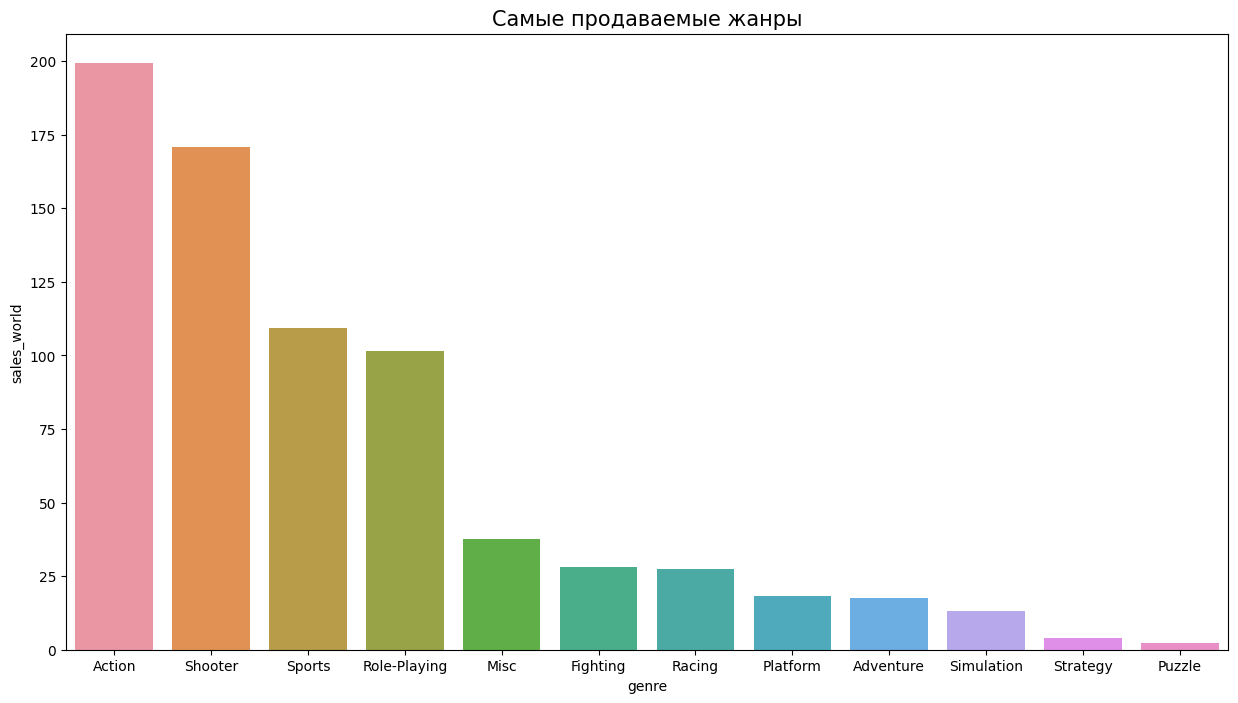

In [ ]:
genre_sales =  df_year.pivot_table(
    index='genre', values='sales_world', aggfunc='sum').sort_values(by='sales_world', ascending=False).reset_index()
plt.figure(figsize=(15,8))
plt.title('Самые продаваемые жанры',fontsize = 15)
sns.barplot(x = genre_sales['genre'] ,y = genre_sales['sales_world'])
plt.show

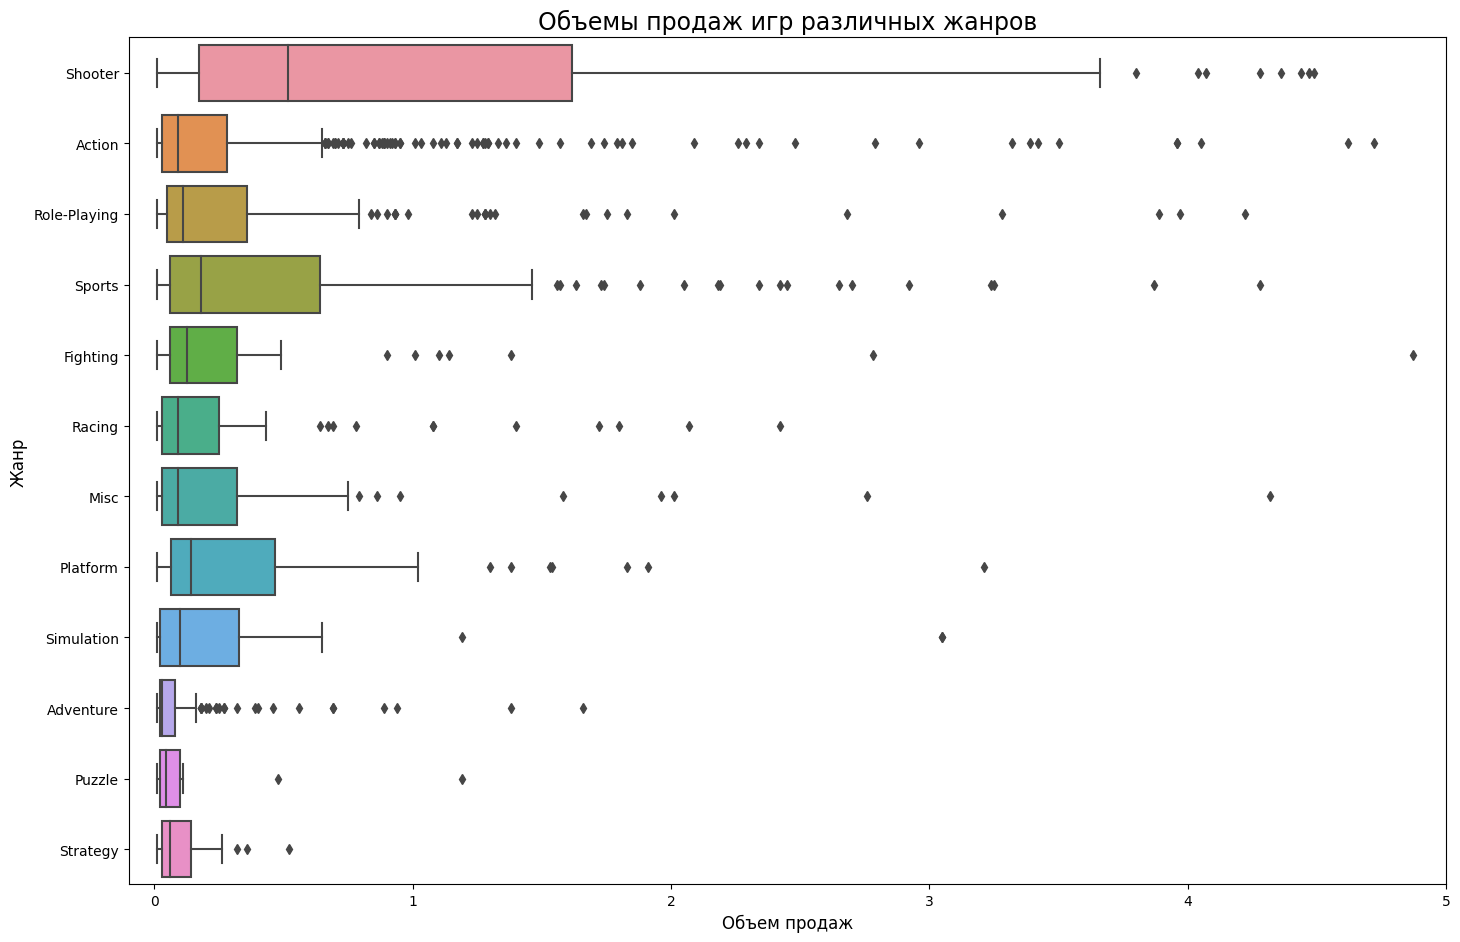

In [ ]:
# Посторим ящик с усами, так как лучше анализировать прибыльность жанра по медиальным продажам, так как они наиболее устойчивы
#выбросам
plt.figure(figsize=(17, 11))
sns.boxplot(data= df_year, y='genre', x='sales_world')
plt.xlim(-0.1, 5)

plt.title('Объемы продаж игр различных жанров', size=17)
plt.xlabel('Объем продаж', size=12)
plt.ylabel('Жанр', size=12)

plt.show()

*Как мы видим, shooter по медиальным продажам лидирует по сравнению с остальными жанрами игр, а action, напротив, по этому критерию отстает, однако, является сымым большим по объему общих продаж жанром. Приключенческие игры и игры-головоломки (puzzle), как правило, не пользуются большой популярностью: их абсолютные и средние продажи одни из самых низких среди всех жанров.*

### Составим портрет пользователя каждого региона. Определим для пользователя каждого региона (NA, EU, JP): -Самые популярные платформы (топ-5).-Самые популярные жанры (топ-5).Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе?




In [ ]:

na_sales = df_year.pivot_table(
    index = ['platform'],values = ('na_sales'),aggfunc  = ('sum')).sort_values(by='na_sales', ascending=False).reset_index()
na_sales_top = na_sales.head(5)

eu_sales = df_year.pivot_table(
index=['platform'], values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index()
eu_sales_top = eu_sales.head(5)

jp_sales = df_year.pivot_table(
    index=['platform'], values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index()
jp_sales_top = jp_sales.head(5)

In [ ]:


fig = go.Figure(
    data=[
    go.Bar(name='North America', x=na_sales_top['platform'], y=na_sales_top['na_sales']),
    go.Bar(name='Europe', x=eu_sales_top['platform'], y=eu_sales_top['eu_sales']),
    go.Bar(name='Japan', x=jp_sales_top['platform'], y=jp_sales_top['jp_sales']),

])

fig.update_layout(barmode='group',title=f'Популярность платформ по регионам')

fig.show()

*ТОП платформ в Северной Америке PS4,XOne,X360,3DS,PS3.
ТОП платформ в Европе PS4,XOne,3DS,PS3,PС.
ТОП платформ в Японии 3DS,PSV,PS4,PS3,Wii
Видны отличая азиатского рынка, лидерами являются портативные консоли. В США и Европе преобладает домашний консольный гейминг приставок нового поколения PS4,XOne .
Как видно из объемов ранок Япония самый маленький по объемам. Большинство консолей кроме XBOX
производится в Японии, отсюда видим ореентицию Японских платформ на внешние рынки США и Европы. Консоли XBOX не пользуются успехом на азиатском рынке. На РС играют только в Европе*

In [ ]:
na_genre = df_year.pivot_table(
    index = ['genre'],values = ('na_sales'),aggfunc  = ('sum')).sort_values(by='na_sales', ascending=False).reset_index()
na_genre_top = na_genre.head(5)

eu_genre = df_year.pivot_table(
    index = ['genre'],values = ('eu_sales'),aggfunc  = ('sum')).sort_values(by='eu_sales', ascending=False).reset_index()
eu_genre_top = eu_genre.head(5)

jp_genre = df_year.pivot_table(
    index = ['genre'],values = ('jp_sales'),aggfunc  = ('sum')).sort_values(by='jp_sales', ascending=False).reset_index()
jp_genre_top = jp_genre.head(5)

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='North America', x=na_genre_top['genre'], y=na_genre_top['na_sales']),
    go.Bar(name='Europe', x=eu_genre_top['genre'], y=eu_genre_top['eu_sales']),
    go.Bar(name='Japan', x=jp_genre_top['genre'], y=jp_genre_top['jp_sales']),
])

fig.update_layout(barmode='group',title=f'Популярность жанров по регионам')
fig.show()

*Лидирующими жанрами в мире являются Shooter,Action,Role-Playing. Есть нишевые жанры для стран: Racing для Европы и Fighting для Японии.*

In [ ]:
na_rating = df_year.pivot_table(
    index = ['rating'],values = ('na_sales'),aggfunc  = ('sum')).sort_values(by='na_sales', ascending=False).reset_index()

eu_rating = df_year.pivot_table(
    index = ['rating'],values = ('eu_sales'),aggfunc  = ('sum')).sort_values(by='eu_sales', ascending=False).reset_index()

jp_rating = df_year.pivot_table(
    index = ['rating'],values = ('jp_sales'),aggfunc  = ('sum')).sort_values(by='jp_sales', ascending=False).reset_index()


In [ ]:
fig = go.Figure(data=[
    go.Bar(name='North America', x=na_rating['rating'], y=na_rating['na_sales']),
    go.Bar(name='Europe', x=eu_rating['rating'], y=eu_rating['eu_sales']),
    go.Bar(name='Japan', x=jp_rating['rating'], y=jp_rating['jp_sales']),
])

fig.update_layout(barmode='group',title=f'Влияние рейтинга на популярность по регионам')

fig.show()

*Расшифровка рейтинга:
«EC» («Early childhood») — «Для детей младшего возраста»
«E» («Everyone») — «Для всех»
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет
«M» («Mature») — «Для взрослых»:  Материалы игры не подходят для лиц младше 17 лет.
«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга
Лидерами продаж, являются игры с рейтингом М. Следующие по популярности игры,с не определенным рейтингом(скорее всего данный по рейтингу отсутвуют или игра не была расчитанна на продажи в страны США и Канады), далее влияние рейтинга на игру рапределены четко по возрасту, чем старше возраст,
тем больше продаж. Можно утверждать что игры предназначенные для взрослой аудитории продаются лучше, но что точно утверждать нельзя, что возраст аудитории соответсвует рейтингу игры( как взрослые играют в детские игры, так и дети играют во взрослые)*

**Общие выводы по исследованию:
Портрет пользователя  Северной Америки на 2017 г. Выделяем две платформы PS4,XOne. Платформы на пике популярности и актуальности.Любимые жанры Shooter,Action,Role-Playing,Sports,Misc. РЕйтинг «EC» М или Е.**

**Портрет пользователя  Европы  на 2017 г. Выделяем  платформы PS4,XOne,PС. Платформы на пике популярности и актуальности.Любимые жанры Shooter,Action,Role-Playing,Sports,Racing. РЕйтинг «EC» М или Е.**

**Портрет пользователя  Японии  на 2017 г. Выделяем  платформы 3DS,PSV,PS4,PS3,Wii.Любимые жанры Shooter,Action,Role-Playing,Fighting . РЕйтинг «EC» не имеет особого влияния на рынок Японии**

### Проверим гипотезы

 Гипотеза №1.

H0
  — средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H1
  — средние пользовательские рейтинги платформ Xbox One и PC различаются.

Для сравнения гипотез берем актуальный период совместного сущесвтования платформ с 2014 г.

In [ ]:

xone = df_year.query('platform == "XOne"')['user_score'].dropna()
pc = df_year.query('platform == "PC"')['user_score'].dropna()

alpha = .05

results = st.ttest_ind(xone, pc, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


*Статистический тест показал, что гипотезу о равенстве среднего пользовательского рейтинга для XOne и PC не получилось отвергнуть. То есть, с вероятностью в 11% можно получитт такую же или бОльшую разницу в оценках  рейтингов двух платформ*

Гипотеза №2.

H0
  — средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые.

H1
  — средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

In [ ]:
action = df_year.query('genre == "Action"')['user_score'].dropna()
sports = df_year.query('genre == "Sports"')['user_score'].dropna()

alpha = .05

results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


*Статистический тест показал, что гипотезу о равенстве среднего пользовательского рейтинга для жанров Action (англ. «действие») и Sports (англ. «виды спорта»)  необходимо отвергнуть. Пользовательские рейтинги этих двух жанров разные.*

### Общий вывод:


Перед анализом данных, мы подготовили наши данные, привели к нижнему регистру названия колонок. Привели к правильным типам данных необходимые столбцы.
Определили, что аббревиатура TBD значит to be determined, to be done. Поэтому заменили tbd на nan для проведения дальнейшего анализа
Проведя анализ, мы выявили, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 1980г,рынок является постоянно растущим. Самые популярные платформы оказались: PS2, X360, PS3, WII, DS, PS
Также мы выявили, что средняя продолжительность жизни игровой приставки составляет порядка 10 лет. Самый пик продаж наступает примерно через 2-5 лет после выпуска платформы. Единственная платформа вне времени РС.
Проведя анализ оценок пользователей и критиков, мы выявили что пользовательская оценка не оказывает очивидного влияние на продажи. Оценка критиков оказывает среднее влияние на продажи
Так же определили, что самый популярный жанр за все время это Экшн, а лучшие продажи по медиане у жанра экшн. На последнем месте стратегии,приключенческие игры и игры-головоломки (puzzle)
Выяснили общий портрет пользователя, для каждого региона.
Проверили гипотезы.

Рекомендации для рекламной и маркетинговой компании на 2017г:
1)Перспиктивными платформами на 2017 г будут являться новые поколения консолей PS4, XOne, для Европейского и Американского рынка.
Платформа РС подходит только для рынка Европы.
Платформы 3DS,PSV,PS4,PS3,Wii для рынка Японии
2)Необходимо делать упор на игры с высоким рейтингом от критиков.
3)Портрет пользователя  Северной Америки :любимые жанры Shooter,Action,Role-Playing,Sports,Misc. РЕйтинг «EC» М или Е.
Портрет пользователя  Европы: любимые жанры Shooter,Action,Role-Playing,Sports,Racing. РЕйтинг «EC» М или Е.
Портрет пользователя  Японии: любимые жанры Shooter,Action,Role-Playing,Fighting . РЕйтинг «EC» не имеет особого влияния на рынок Японии








